# COVID19 - CANADÁ - ESTATÍSTICAS

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


#sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

Começar Qgis  GUI e começar um projeto

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

Junção das camada shp e csv num campo comum

In [3]:
vectorLyr=QgsVectorLayer("C:\\Users\\anaca\\Desktop\\Projeto_canada\\Mapa\\lpr_000b16a_e.shp","Canada","ogr")
vectorLyr.isValid()

uri='file:///C:/OSGeo4W64/bin/SIG/Projeto_Canada/Projeto_canada/Dados/Canada_t.csv?delimiter=,'
infoLyr=QgsVectorLayer(uri,'','delimitedtext')
infoLyr.isValid()


QgsProject.instance().addMapLayer(vectorLyr)
QgsProject.instance().addMapLayer(infoLyr)
csvField='province'
shpField='PRENAME'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(infoLyr.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(infoLyr)
vectorLyr.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('Canada')[0]

for field in vlayer.fields():
    print("Column "+field.name()+" Load")

Column PRUID Load
Column PRNAME Load
Column PRENAME Load
Column PRFNAME Load
Column PREABBR Load
Column PRFABBR Load
Column _date_active Load
Column _cumulative_cases Load
Column _cumulative_recovered Load
Column _cumulative_deaths Load
Column _active_cases Load
Column _active_cases_change Load
Column _cumulative_testing Load


# Gráfico do número de mortes, casos confirmados e casos recuperados

In [4]:
dict = []

for feature in vlayer.getFeatures():
    if feature['PRENAME']:
        province = feature['PRENAME']
        if feature['_cumulative_cases']:
            confirmed = feature['_cumulative_cases']
        else:
            confirmed = 0
        if feature['_cumulative_recovered']:
            recovered = feature['_cumulative_recovered']
        else:
            recovered = 0
        if feature['_cumulative_deaths']:
            deaths = feature['_cumulative_deaths']
        else:
            deaths = 0
        if feature['_active_cases']:
            active = feature['_active_cases']
        else:
            active = 0
        if feature['_cumulative_testing']:
            tests = feature['_cumulative_testing']
        else:
            tests = 0
    e = {'Name': province, 'Confirmed': confirmed, 'Death': deaths, 'Recovered': recovered, 'Active': active, 'Tests': tests}
    dict.append(e)

In [5]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Recovered'],reverse=True)
a = sorted(dict, key = lambda i: i['Active'],reverse=True)
t = sorted(dict, key = lambda i: i['Tests'],reverse=True)

top3confirmed = c[0:5]
top3death = d[0:5]
top3recovered = r[0:5]
top3active = a[0:5]
top3tests = t[0:5]

bottom3confirmed = c[size:]
bottom3death = d[size:]
bottom3active = a[size:]
bottom3tests = t[size:]

# Top 3 Casos Confirmados / Bottom 3 Casos Confimados

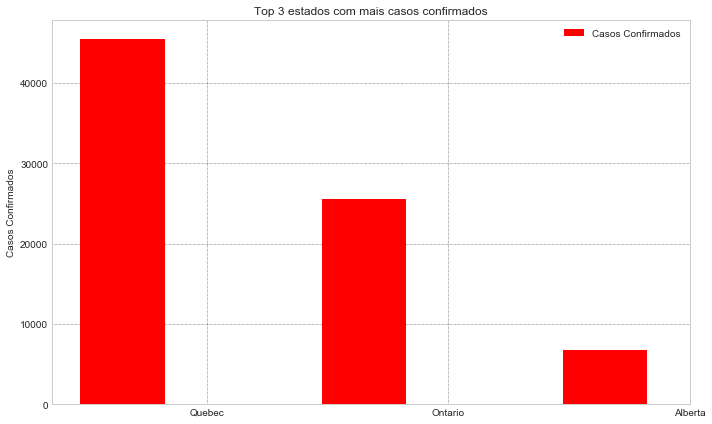

In [6]:
delta1 = [top3confirmed[0]['Confirmed'],top3confirmed[1]['Confirmed'],top3confirmed[2]['Confirmed']]
province = [top3confirmed[0]['Name'],top3confirmed[1]['Name'],top3confirmed[2]['Name']]

fig = plt.figure(figsize=[10,6]);
index = np.arange(3)
bar_width = 0.35


rects1 = plt.bar(index, delta1, bar_width, label='Casos Confirmados', color='red')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Casos Confirmados')
plt.title('Top 3 estados com mais casos confirmados')
plt.xticks(index + bar_width,province,)
plt.legend()

plt.tight_layout()
plt.savefig('graf/top3positivos.jpg', bbox_inches='tight')
plt.show()


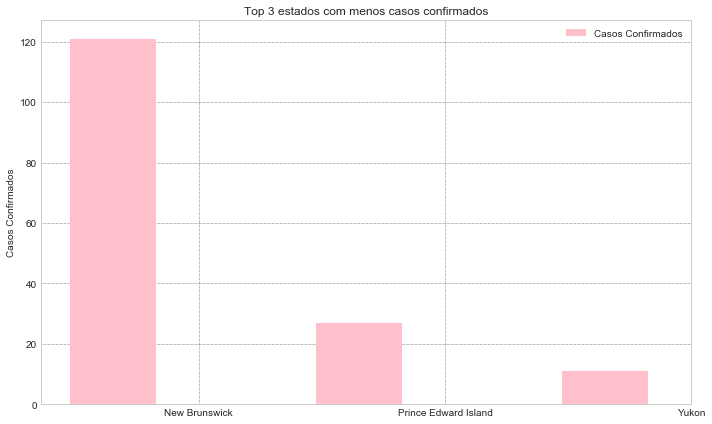

In [7]:
delta1 = [bottom3confirmed[0]['Confirmed'],bottom3confirmed[1]['Confirmed'],bottom3confirmed[2]['Confirmed']]
province = [bottom3confirmed[0]['Name'],bottom3confirmed[1]['Name'],bottom3confirmed[2]['Name']]

fig = plt.figure(figsize=[10,6]);
index = np.arange(3)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos Confirmados', color='pink')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Casos Confirmados')
plt.title('Top 3 estados com menos casos confirmados')
plt.xticks(index + bar_width,province,)
plt.legend()

plt.tight_layout()
plt.savefig('graf/top3menospositivos.jpg', bbox_inches='tight')
plt.show()

# Top 3 Mortes/ Bottom 3 Mortes

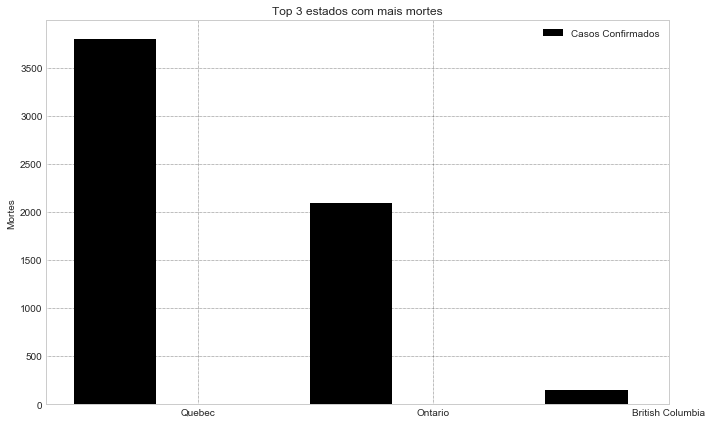

In [8]:
delta1 = [top3death[0]['Death'],top3death[1]['Death'],top3death[2]['Death']]
province = [top3death[0]['Name'],top3death[1]['Name'],top3death[2]['Name']]

fig = plt.figure(figsize=[10,6]);
index = np.arange(3)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos Confirmados', color='black')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Mortes')
plt.title('Top 3 estados com mais mortes')
plt.xticks(index + bar_width,province,)
plt.legend()

plt.tight_layout()
plt.savefig('graf/top3mortes.jpg', bbox_inches='tight')
plt.show()

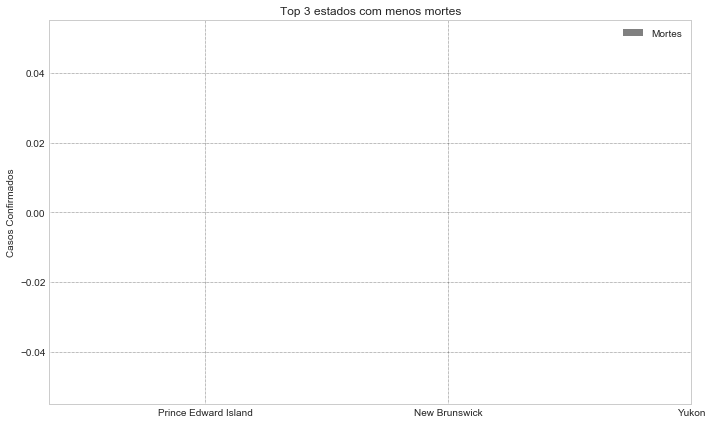

In [9]:
delta1 = [bottom3death[0]['Death'],bottom3death[1]['Death'],bottom3death[2]['Death']]
province = [bottom3death[0]['Name'],bottom3death[1]['Name'],bottom3death[2]['Name']]

fig = plt.figure(figsize=[10,6]);
index = np.arange(3)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Mortes', color='grey')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Casos Confirmados')
plt.title('Top 3 estados com menos mortes')
plt.xticks(index + bar_width,province,)
plt.legend()

plt.tight_layout()
plt.savefig('graf/top3menosmortes.jpg', bbox_inches='tight')
plt.show()

# Top 3 Casos Recuperados

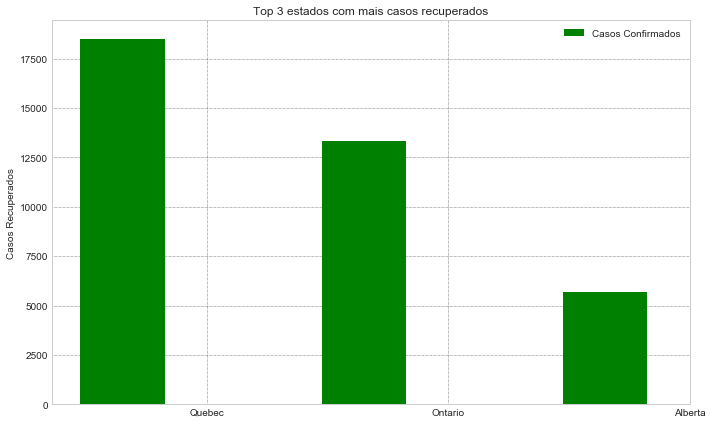

In [10]:
delta1 = [top3recovered[0]['Recovered'],top3recovered[1]['Recovered'],top3recovered[2]['Recovered']]
province = [top3confirmed[0]['Name'],top3confirmed[1]['Name'],top3confirmed[2]['Name']]

fig = plt.figure(figsize=[10,6]);
index = np.arange(3)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos Confirmados', color='green')
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

plt.ylabel('Casos Recuperados')
plt.title('Top 3 estados com mais casos recuperados')
plt.xticks(index + bar_width,province,)
plt.legend()

plt.tight_layout()
plt.savefig('graf/top3recuperados.jpg', bbox_inches='tight')
plt.show()

# Comparação entre as provincias mais afetadas

<Figure size 1440x720 with 0 Axes>

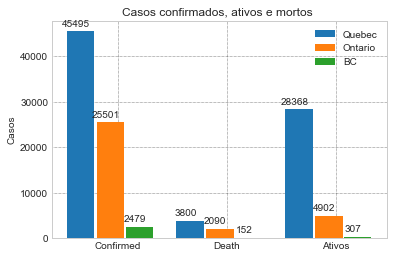

In [11]:
labels = ['Confirmed', 'Death', 'Ativos']
Quebec_stat = []
Ontario_stat = []
BC_stat = []

for feature in vlayer.getFeatures():
    if feature['PRENAME']=="Quebec":
        Quebec_stat.append(feature['_cumulative_cases'])
        Quebec_stat.append(feature['_cumulative_deaths'])
        Quebec_stat.append(feature['_active_cases'])

for feature in vlayer.getFeatures():
    if feature['PRENAME']=="Ontario":
        Ontario_stat.append(feature['_cumulative_cases'])
        Ontario_stat.append(feature['_cumulative_deaths'])
        Ontario_stat.append(feature['_active_cases'])

for feature in vlayer.getFeatures():
    if feature['PRENAME']=="British Columbia":
        BC_stat.append(feature['_cumulative_cases'])
        BC_stat.append(feature['_cumulative_deaths'])
        BC_stat.append(feature['_active_cases'])
        
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=(20,10))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.35, Quebec_stat, width, label='Quebec')
rects2 = ax.bar(x - width/4, Ontario_stat, width, label='Ontario')
rects3 = ax.bar(x + width/1.25, BC_stat, width, label='BC')

plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Casos')
ax.set_title('Casos confirmados, ativos e mortos ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#fig.tight_layout()
plt.savefig('graf/comparacao.jpg', bbox_inches='tight')
plt.show()

# Testes Efetuados por Provincia 

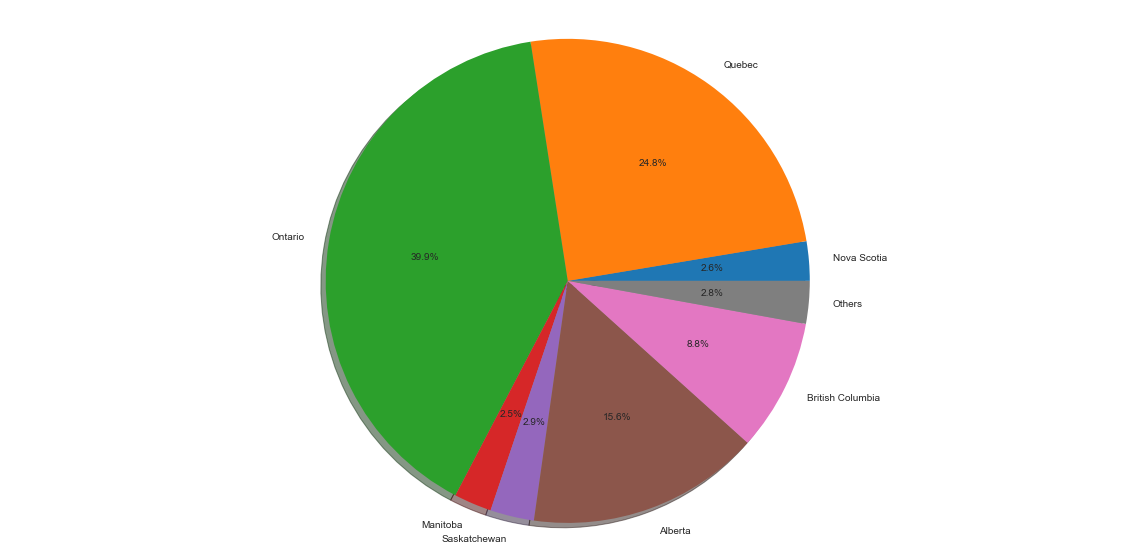

In [12]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in vlayer.getFeatures():
    if feature['_cumulative_testing']:
        total += feature['_cumulative_testing']

for feature in vlayer.getFeatures():
    if feature['_cumulative_testing']:
        if (feature['_cumulative_testing']/total) > 0.025:
            values.append(feature['_cumulative_testing'])
            labels.append(feature['PRENAME'])
        else:
            lowerTotal += feature['_cumulative_testing']
            
fig = plt.figure(figsize=[20,10]);
            
values.append(lowerTotal)
labels.append("Others")

plt.pie(values, labels=labels, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('graf/testespie.jpg', bbox_inches='tight')
plt.show()

# Número de casos em Ontário por dia

In [13]:
uri='file:///C:/OSGeo4W64/bin/SIG/Projeto_Canada/Projeto_canada/dados_estatistica/active_timeseries_prov.csv?delimiter=,'
infoLyr=QgsVectorLayer(uri,'','delimitedtext')
infoLyr.isValid()

uri='file:///C:/OSGeo4W64/bin/SIG/Projeto_Canada/Projeto_canada/dados_estatistica/testing_timeseries_prov.csv?delimiter=,'
tLyr=QgsVectorLayer(uri,'','delimitedtext')
tLyr.isValid()


True

In [14]:
df = pd.read_csv('C:\\Users\\anaca\\Desktop\\Projeto_canada\\dados_estatistica\\active_timeseries_prov.csv')
df.head()

,province,date_active,cumulative_cases,cumulative_recovered,cumulative_deaths,active_cases,active_cases_change
0,Alberta,25-01-2020,0,0,0,0,0
1,Alberta,26-01-2020,0,0,0,0,0
2,Alberta,27-01-2020,0,0,0,0,0
3,Alberta,28-01-2020,0,0,0,0,0
4,Alberta,29-01-2020,0,0,0,0,0


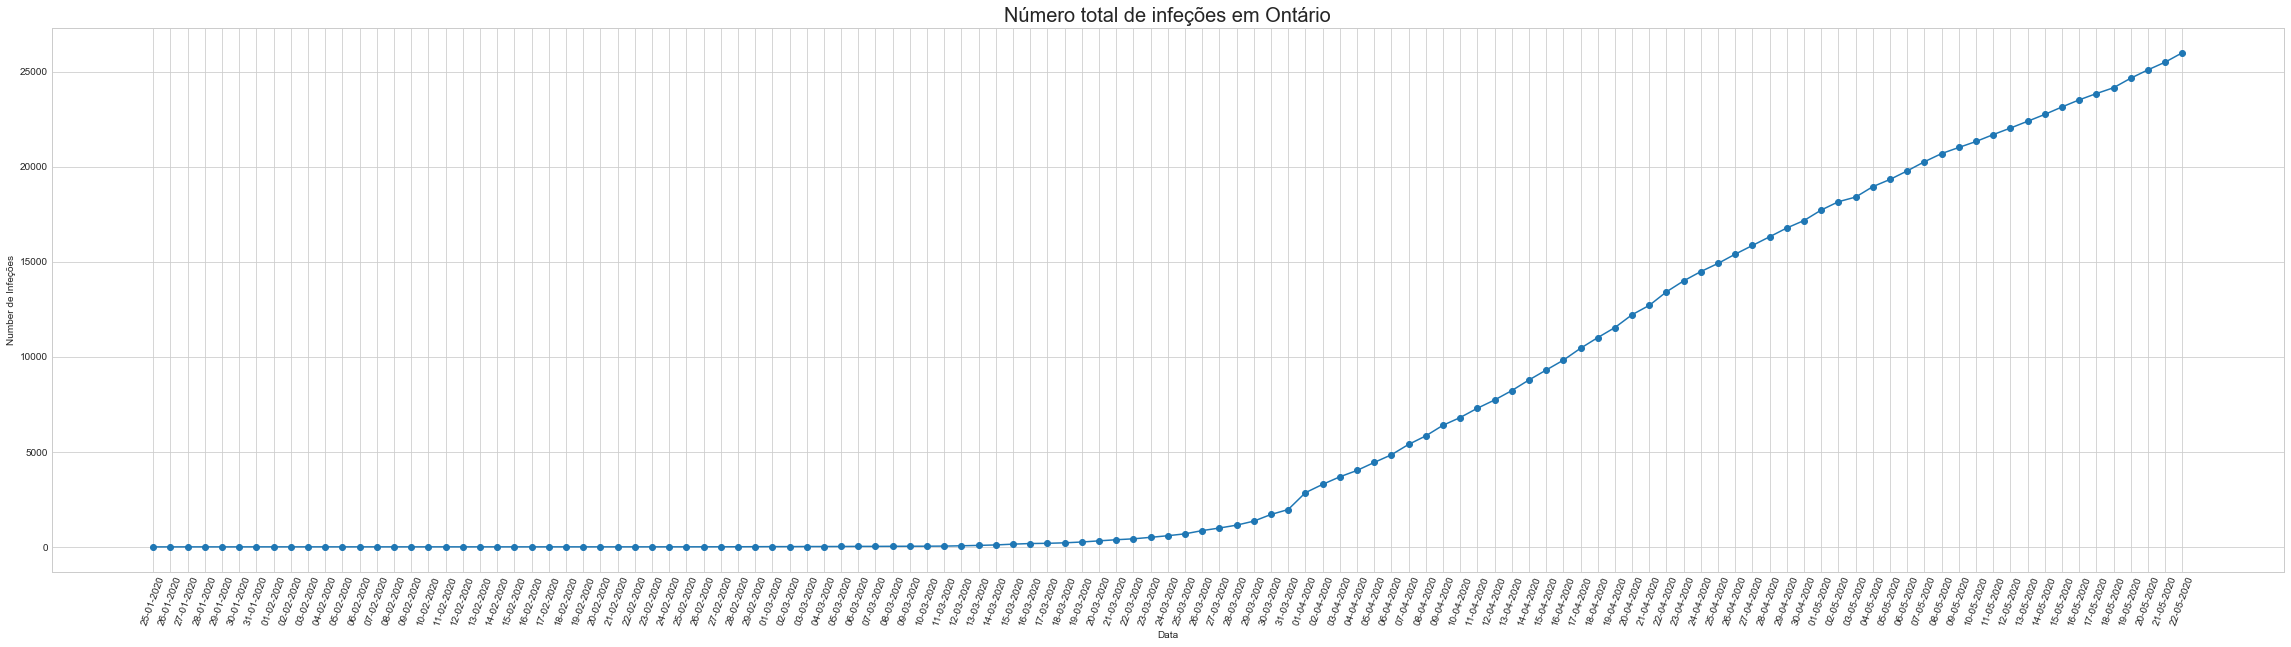

In [15]:
values = []
labels = []
datas = []
lowerTotal = 0
i = 0


for feature in infoLyr.getFeatures():
    if feature['province']=="Ontario":
        if feature['cumulative_cases']>0:
            values.append(feature['cumulative_cases'])
            labels.append(feature['date_active'])
            

fig = plt.figure(figsize=[40,10]);

cov_date = pd.Series(values, index=labels)
plt.xlabel('Data')
plt.tick_params(axis='x', rotation=70)
plt.ylabel('Number de Infeções')
plt.title('Número total de infeções em Ontário', fontsize=20)
plt.plot(cov_date, 'o-')
plt.savefig('graf/linhaconfo.jpg', bbox_inches='tight')

# Número de testes efetuados em Ontário por dia

In [16]:
df = pd.read_csv('C:\\Users\\anaca\\Desktop\\Projeto_canada\\dados_estatistica\\testing_timeseries_prov.csv')
df.head()

,province,date_testing,testing,cumulative_testing,testing_info
0,Alberta,15-03-2020,7108,7108,NaN
1,Alberta,16-03-2020,3490,10598,NaN
2,Alberta,17-03-2020,1757,12355,NaN
3,Alberta,18-03-2020,2211,14566,NaN
4,Alberta,19-03-2020,2447,17013,NaN


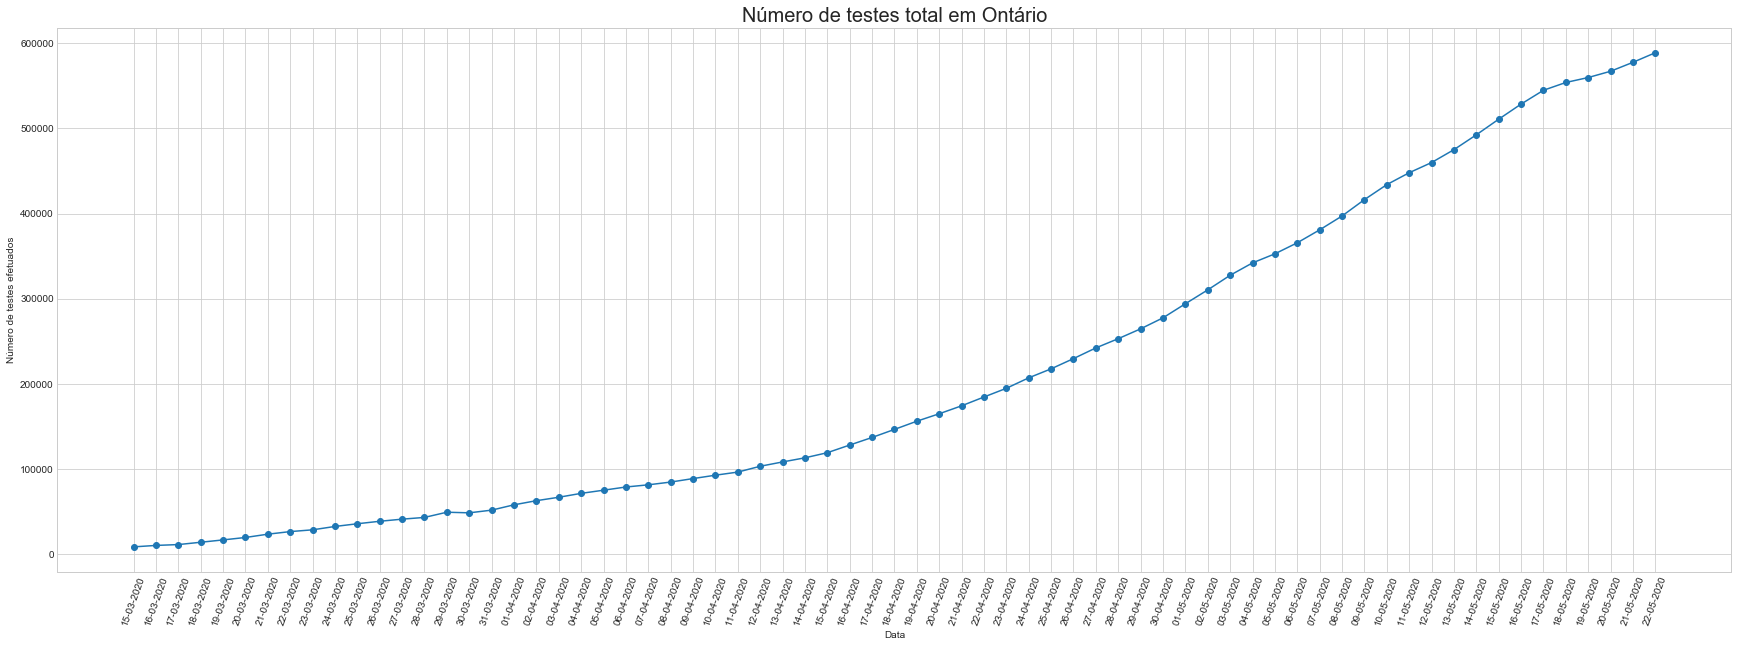

In [17]:
values = []
labels = []
datas = []
lowerTotal = 0
i = 0


for feature in tLyr.getFeatures():
    if feature['province']=="Ontario":
        if feature['cumulative_testing']>0:
            values.append(feature['cumulative_testing'])
            labels.append(feature['date_testing'])
            

fig = plt.figure(figsize=[30,10]);

cov_date = pd.Series(values, index=labels)
plt.xlabel('Data')
plt.tick_params(axis='x', rotation=70)
plt.ylabel('Número de testes efetuados')
plt.title('Número de testes total em Ontário', fontsize=20)
plt.plot(cov_date, 'o-')
plt.savefig('graf/linhatesteso.jpg', bbox_inches='tight')

# Logaritmo de testes efetuados num dia

C:\OSGEO4~1\apps\Python37\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\OSGEO4~1\apps\Python37\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 3600x576 with 0 Axes>

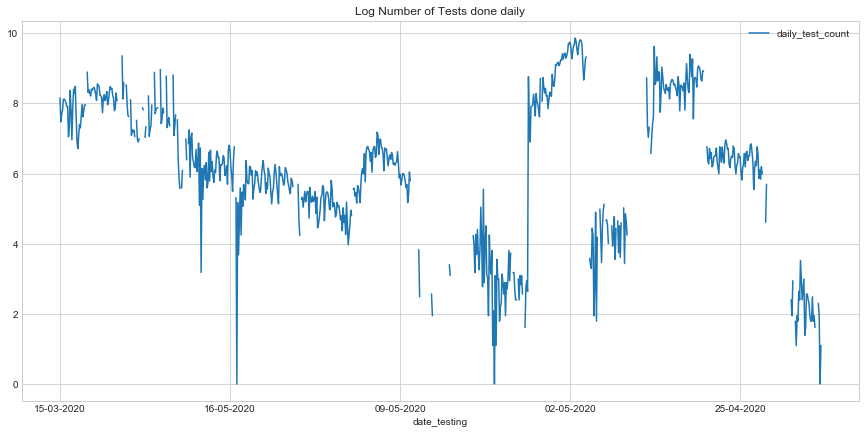

In [18]:
fig = plt.figure(figsize=[50,8]);
df3 = df.assign(daily_test_count=np.zeros(df.shape[0]))
df4 = df3.shift(periods=-1, axis='rows')
df3.daily_test_count = np.log(df4.cumulative_testing - df3.cumulative_testing)
df3.plot(x ='date_testing', y='daily_test_count', kind = 'line', figsize=(15,7), title='Log Number of Tests done daily')